## 실행

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd /content/drive/My Drive/whole_train/1. whole_train

/content/drive/My Drive/whole_train/1. whole_train


In [0]:
import os
os.getcwd()

'/content/drive/My Drive/whole_train/1. whole_train'

In [0]:
import numpy as np 

X_train , Y_train , X_test, Y_test = np.load('train.npy', allow_pickle=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10866, 128, 128, 1)
(10866, 1)
(1208, 128, 128, 1)
(1208, 1)


In [0]:
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization 
from keras.layers import concatenate, Conv2DTranspose, Reshape
from os import path

def whole_model():
    inputs = Input((128,128,1))
    depth = 16
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(0.25)(pool2)

    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = Dropout(0.25)(pool3)

    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = Dropout(0.25)(pool4)

    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
    pool5 = Dropout(0.25)(pool5)

    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(pool5)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(int(depth*32), (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    pool6 = MaxPooling2D(pool_size=(2, 2))(conv6)
    pool6 = Dropout(0.25)(pool6)
    
    c_conv_output = pool6
    dense1 = Flatten()(c_conv_output)
    dense2 = Dense(int(depth*32), activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    c_outputs = Dense(2, activation='softmax')(dense2)
    c_model_ = Model(inputs=[inputs], outputs=[c_outputs] ,name= 'cn_model')


    up7 = concatenate([Conv2DTranspose(int(depth*32), (2, 2), strides=(2, 2), padding='same')(conv6), conv5], axis=3)
    conv7 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(int(depth*16), (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    
    up8 = concatenate([Conv2DTranspose(int(depth*16), (2, 2), strides=(2, 2), padding='same')(conv7), conv4], axis=3)
    conv8 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(int(depth*8), (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    
    up9 = concatenate([Conv2DTranspose(int(depth*8), (2, 2), strides=(2, 2), padding='same')(conv8), conv3], axis=3)
    conv9 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(int(depth*4), (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)
    
    up10 = concatenate([Conv2DTranspose(int(depth*4), (2, 2), strides=(2, 2), padding='same')(conv9), conv2], axis=3)
    conv10 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(up10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv10)
    conv10 = BatchNormalization()(conv10)
    conv10 = Conv2D(int(depth*2), (3, 3), activation='relu', padding='same')(conv10)
    conv10 = BatchNormalization()(conv10)    
    
    up11 = concatenate([Conv2DTranspose(int(depth*2), (2, 2), strides=(2, 2), padding='same')(conv10), conv1], axis=3)
    conv11 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(up11)
    conv11 = BatchNormalization()(conv11)
    conv11 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv11)
    conv11 = BatchNormalization()(conv11)
    conv11 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv11)
    conv11 = BatchNormalization()(conv11)
    conv11 = Conv2D(int(depth*1), (3, 3), activation='relu', padding='same')(conv11)
    conv11 = BatchNormalization()(conv11)    
    
    conv12 = Conv2D(1, (1, 1), activation='tanh')(conv11)
    g_model = Model(inputs=[inputs], outputs=[conv12])

    return c_model_ , g_model

Using TensorFlow backend.


In [0]:
c_model_ , g_model = whole_model()

In [0]:
import keras 
c_model  = keras.models.load_model('eq_c_model.h5')
c_model.trainable = False
d_model  = keras.models.load_model('eq_gan_d.h5')
d_model.trainable = False
g_model.trainable = True

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
# c_model prediction 
# c_pred = c_model.predict(X_test)

# import keras
# loss, acc = c_model.evaluate(X_test, Y_test)
# print("loss =", loss)
# print("acc =", acc)

# predicted_c = np.argmax(c_pred, axis = 1)
# print(predicted_c)

In [0]:
# d_model prediction
# d_pred = d_model.predict(X_test)

# import matplotlib.pyplot as plt  

# predicted_gan = np.argmax(d_pred, axis = 1)
# print(predicted_gan)
# plt.hist(predicted_gan, range=(0, 1))

In [0]:
from IPython.display import clear_output
from keras.callbacks import Callback
import matplotlib.pyplot as plt

#callback util 

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):

        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.x_ = []
        self.accuracy = []
        self.val_accuracy = []
        

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))

        self.i += 1

        clear_output(wait=True)
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.plot(self.x, self.accuracy, label="accuracy")
        plt.plot(self.x, self.val_accuracy, label="val_accuracy")
        plt.legend()
        plt.show()

        print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])
        print("accuracy = ", self.accuracy[-1], ", val_accuracy = ", self.val_accuracy[-1])

    

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 학습 중에 loss 그리기
plot_losses = PlotLosses()

# overfitting이 발생하면 학습 중지
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# 학습 실행하면서 학습율 감소시키기
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


from keras import optimizers
from keras.optimizers import Adam
from os import path

callbacks = [plot_losses, reduce_lr]

In [0]:
# Util 함수

def show_result(target_data=X_test, count=10, threshold=0.2):

    shuffled_index = np.random.permutation(X_test.shape[0])
    shuffled_index = np.arange(0,count)
    model_input_shape = (1,128, 128, 1)

    for i in range(count):
        cl_ = Y_test[i]
        target_input = target_data[shuffled_index[i]]
        c_out = c_model.predict(target_input.reshape(model_input_shape)) 
        g_out = g_model.predict(target_input.reshape(model_input_shape))
        d_out = d_model.predict(g_out)
        c_out_g_in = c_model.predict(g_out)
        
        diff = np.absolute(g_out[0] - target_input)
        diff[diff < threshold] = 0.0

        # 실제 원본 이미지
        if Y_test[i] == 0 :
            print('Input is classified as Normal image %.1f' % Y_test[i], '(0 : Normal, 1 : Fracture)')
        else : 
            print('Input is classified as Fracture image %.1f' % Y_test[i], '(0 : Normal, 1 : Fracture)')

        # classify  0 normal, 1 fracture 원본이미지의 분류
        if c_out[0][1] <= 0.5 :  
            print('Classified as Normal Image %.3f' % c_out[0][1], '(0 : Normal, 1 : Fracture)')
        else :
            print('Classified as fractrue Image %.3f' % c_out[0][1], '(0 : Normal, 1 : Fracture)')
        
        # discriminator 0 real 1 fake 제너레이터를 통과한 이미지의 디스크리미네이터 진짜와 가짜
        d_out_ = np.argmax(d_out, axis = 1)
        if d_out_ <= 0.5 :  
            print('Generated is Discriminated as Real image %.3f' % d_out_, '(0 : Real, 1 : Fake)')
        else : 
            print('Generated is Discriminated as Fake image %.3f' % d_out_, '(0 : Real, 1 : Fake)')            
            
        # generator_classify 0 normal, 1 fracture 제너레이터의 분류
        if c_out_g_in[0][1] <= 0.5 :  
            print('Generated is classified as Normal Image %.3f' % c_out_g_in[0][1], '(0 : Normal, 1 : Fracture)')
        else :
            print('Generated is classified as Fracture Image %.3f' % c_out_g_in[0][1], '(0 : Normal, 1 : Fracture)')

            
        plt.figure(figsize=(10,10))
        plt.subplot(1,3,1)
        plt.title('Input img')
        plt.axis('off')
        plt.imshow(target_input.reshape((128,128)),cmap='gray' , vmin=0, vmax=1)
        
        plt.subplot(1,3,2)
        plt.title('Generated img')
        plt.axis('off')
        plt.imshow(g_out[0].reshape((128,128)),cmap='gray', vmin=0, vmax=1)
        
        plt.subplot(1,3,3)
        plt.title('Fracture area')
        plt.axis('off')
        plt.imshow(diff.reshape((128,128)),cmap='gray', vmin=0, vmax=1)
        plt.show()
        plt.close()
        print()
#cmap=plt.cm.binary
# show_result(X_test, threshold=0.1)

In [0]:
real = np.zeros(X_train.shape[0])
normal= np.zeros(X_train.shape[0])

## 0.007 0.986 0.007

In [0]:
inputs = Input((128,128,1))
generated = g_model(inputs)
d_output = d_model(generated)
c_output = c_model(generated)

# 비율로 최적화된 학습 
# d_r = 0.10 
# u_r = 0.80 
# c_r = 0.10 

# d_r = 0.05  0.06 0.07
# u_r = 0.90  0.88 0.86
# c_r = 0.05  0.06 0.07

d_r = 0.007
u_r = 0.986
c_r = 0.007


import keras.backend as K

def custom_loss(y_true, y_pred):
    return c_r * K.mean(c_output) + u_r * K.mean(keras.losses.mean_squared_error(inputs, generated)) + d_r * K.mean(d_output)

whole_model = Model(inputs=[inputs], outputs=[d_output, c_output])

whole_model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])

In [0]:
hist = whole_model.fit(X_train, [real, normal], validation_split=0.1, epochs=20, batch_size=32, verbose=1, callbacks=callbacks)

Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.999 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


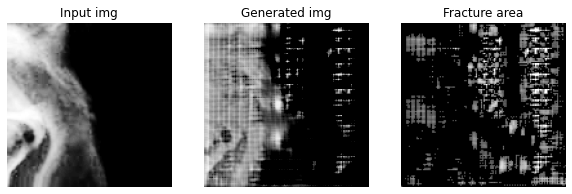


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.998 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


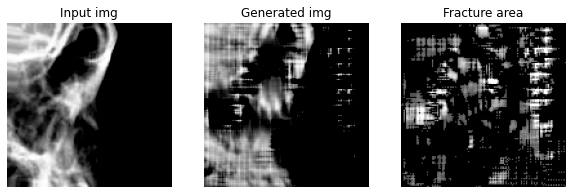


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.004 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


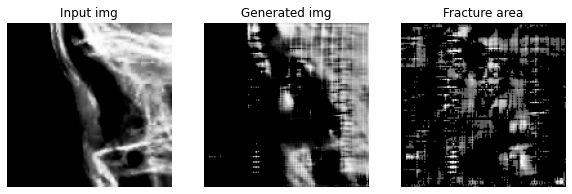


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.997 (0 : Normal, 1 : Fracture)


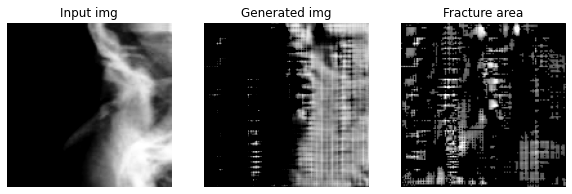


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.999 (0 : Normal, 1 : Fracture)


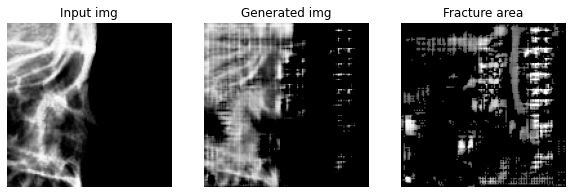


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


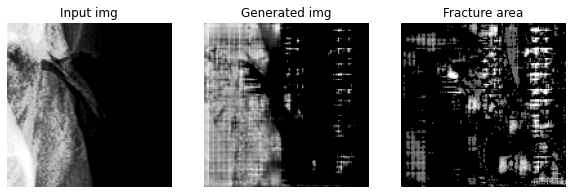


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.996 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


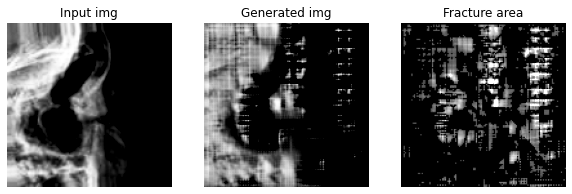


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.001 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


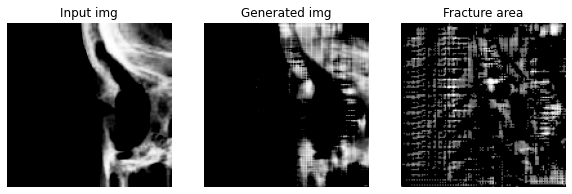


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.979 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.999 (0 : Normal, 1 : Fracture)


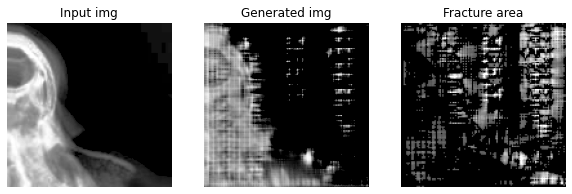


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


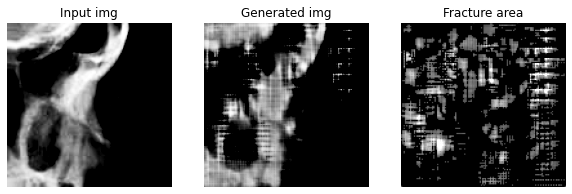

In [0]:
# 0.007 0.986 0.007
show_result(X_test,threshold = 0.3)

In [0]:
# 모델 저장
whole_model.save('./model/eq_whole_007986.h5')

## 0.004 0.992 0.004

In [0]:
inputs = Input((128,128,1))
generated = g_model(inputs)
d_output = d_model(generated)
c_output = c_model(generated)

# 비율로 최적화된 학습 
# d_r = 0.10 
# u_r = 0.80 
# c_r = 0.10 

# d_r = 0.05  0.06 0.07
# u_r = 0.90  0.88 0.86
# c_r = 0.05  0.06 0.07


d_r = 0.004
u_r = 0.992
c_r = 0.004

import keras.backend as K

def custom_loss(y_true, y_pred):
    return c_r * K.mean(c_output) + u_r * K.mean(keras.losses.mean_squared_error(inputs, generated)) + d_r * K.mean(d_output)

whole_model = Model(inputs=[inputs], outputs=[d_output, c_output])

whole_model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])
whole_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128, 128, 1)  17148161    input_2[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            135041      model_1[1][0]                    
__________________________________________________________________________________________________
model_5 (Model)                 (None, 2)            12078674    model_1[1][0]                    
Total params: 29,361,876
Trainable params: 17,136,129
Non-trainable params: 12,225,747
_____

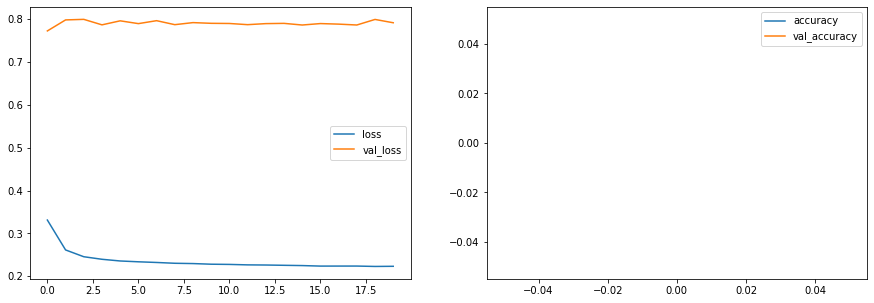

loss =  0.22316248187082338 , val_loss =  0.7916815218403456
accuracy =  None , val_accuracy =  None


In [0]:
hist = whole_model.fit(X_train, [real, normal], validation_split=0.1, epochs=20, batch_size=32, verbose=1, callbacks=callbacks)

Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.999 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.998 (0 : Normal, 1 : Fracture)


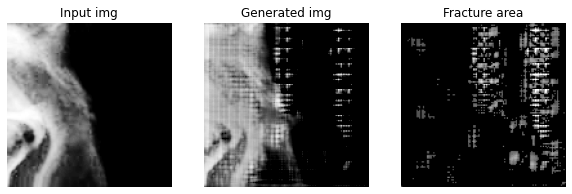


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.998 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


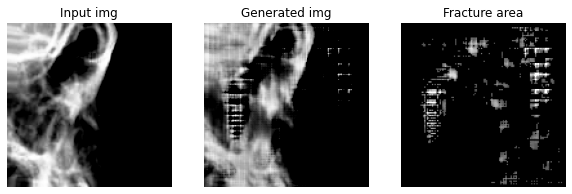


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.004 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.997 (0 : Normal, 1 : Fracture)


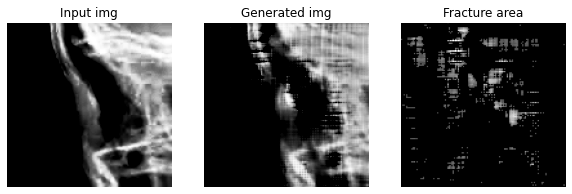


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.998 (0 : Normal, 1 : Fracture)


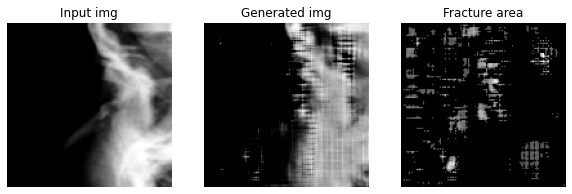


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.363 (0 : Normal, 1 : Fracture)


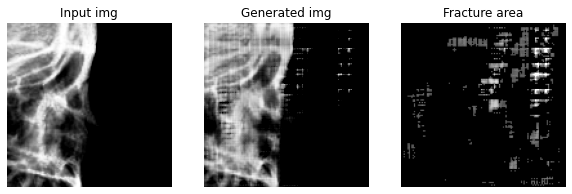


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


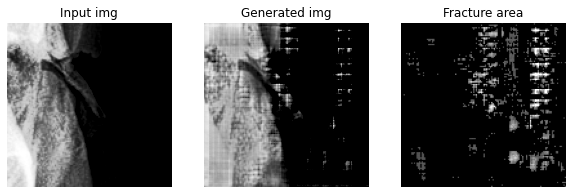


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.996 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.989 (0 : Normal, 1 : Fracture)


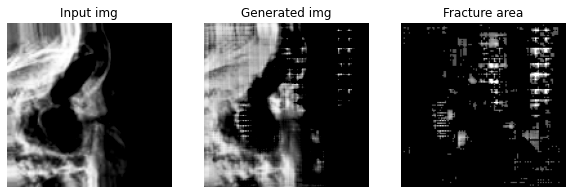


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.001 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.001 (0 : Normal, 1 : Fracture)


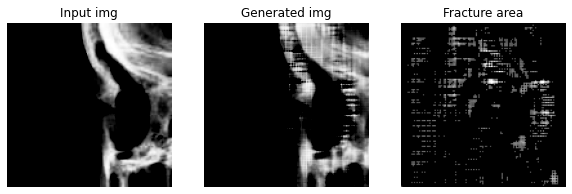


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.979 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.958 (0 : Normal, 1 : Fracture)


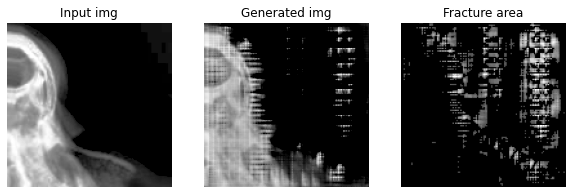


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


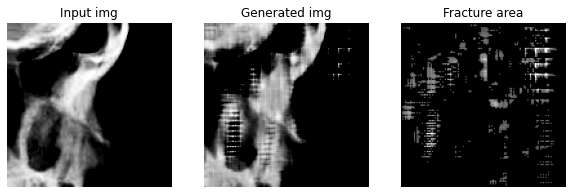

In [0]:
# 0.004 0.992 0.004
show_result(X_test,threshold = 0.3)

In [0]:
# 모델 저장
whole_model.save('./model/eq_whole_004992.h5')

## 0.0006 0.9988 0.0006

In [0]:
inputs = Input((128,128,1))
generated = g_model(inputs)
d_output = d_model(generated)
c_output = c_model(generated)

# 비율로 최적화된 학습 
# d_r = 0.10 
# u_r = 0.80 
# c_r = 0.10 

# d_r = 0.05  0.06 0.07
# u_r = 0.90  0.88 0.86
# c_r = 0.05  0.06 0.07


d_r = 0.0006
u_r = 0.9988
c_r = 0.0006

import keras.backend as K

def custom_loss(y_true, y_pred):
    return c_r * K.mean(c_output) + u_r * K.mean(keras.losses.mean_squared_error(inputs, generated)) + d_r * K.mean(d_output)

whole_model = Model(inputs=[inputs], outputs=[d_output, c_output])

whole_model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])
whole_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128, 128, 1)  17148161    input_2[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            135041      model_1[1][0]                    
__________________________________________________________________________________________________
model_5 (Model)                 (None, 2)            12078674    model_1[1][0]                    
Total params: 29,361,876
Trainable params: 17,136,129
Non-trainable params: 12,225,747
_____

### 20 epochs

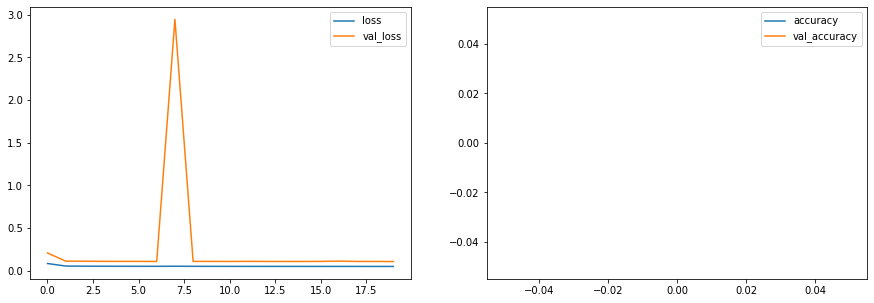

loss =  0.0493696032411781 , val_loss =  0.10739439691604555
accuracy =  None , val_accuracy =  None


In [0]:
hist = whole_model.fit(X_train, [real, normal], validation_split=0.1, epochs=20, batch_size=32, verbose=1, callbacks=callbacks, shuffle=True)

Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.999 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.999 (0 : Normal, 1 : Fracture)


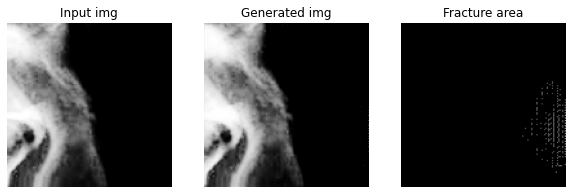


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.998 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.999 (0 : Normal, 1 : Fracture)


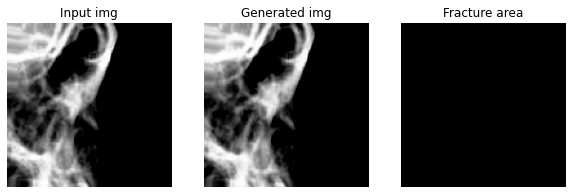


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.004 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.007 (0 : Normal, 1 : Fracture)


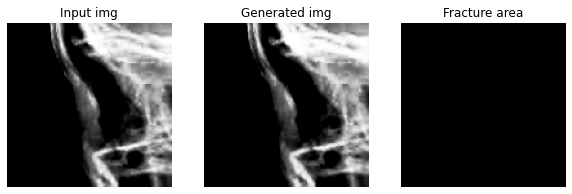


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


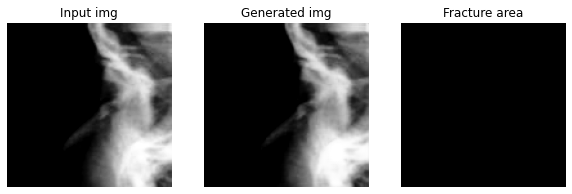


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.000 (0 : Normal, 1 : Fracture)


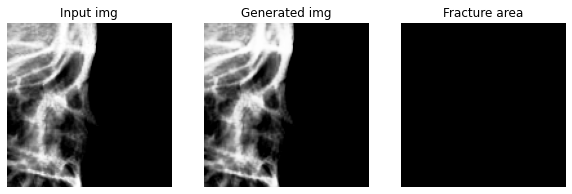


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


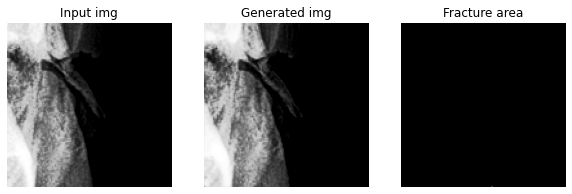


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.996 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.998 (0 : Normal, 1 : Fracture)


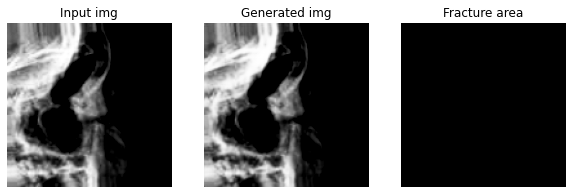


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.001 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.001 (0 : Normal, 1 : Fracture)


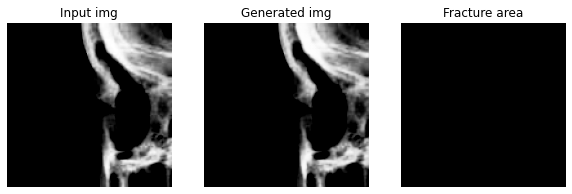


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.979 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.765 (0 : Normal, 1 : Fracture)


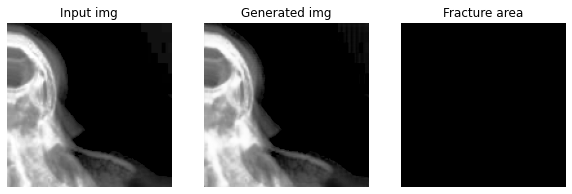


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.999 (0 : Normal, 1 : Fracture)


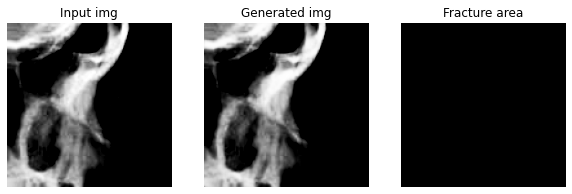

In [0]:
# 0.0006 0.9988 0.0006
show_result(X_test,threshold = 0.3)

In [0]:
# 모델 저장
whole_model.save('./model/eq_whole_0006.h5')
print('==model saved==')

==model saved==


### 10 epochs

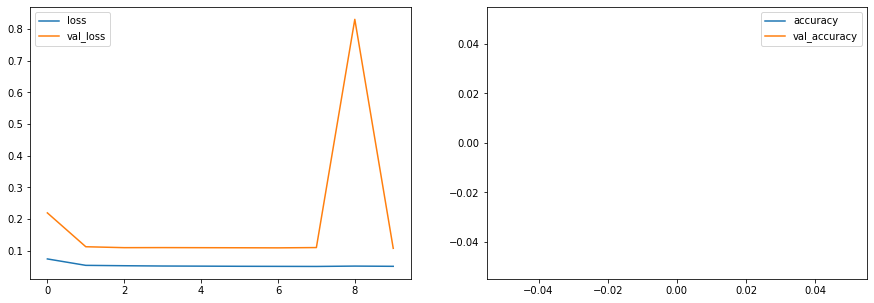

loss =  0.05050806764839726 , val_loss =  0.10731910380235811
accuracy =  None , val_accuracy =  None


In [0]:
# 10 epochs
hist = whole_model.fit(X_train, [real, normal], validation_split=0.1, epochs=10, batch_size=32, verbose=1, callbacks=callbacks, shuffle=True)

Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.999 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.999 (0 : Normal, 1 : Fracture)


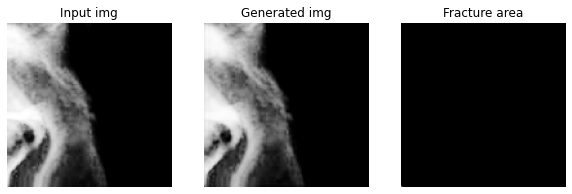


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.998 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.975 (0 : Normal, 1 : Fracture)


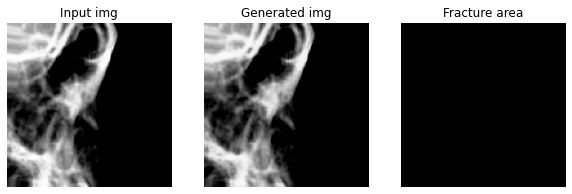


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.004 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.002 (0 : Normal, 1 : Fracture)


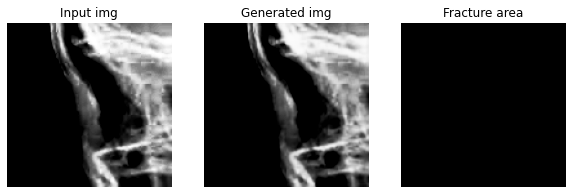


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


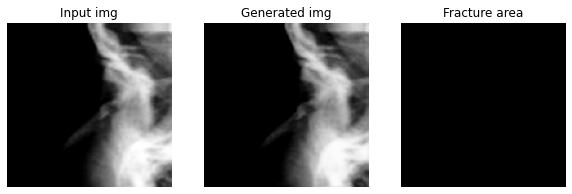


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.000 (0 : Normal, 1 : Fracture)


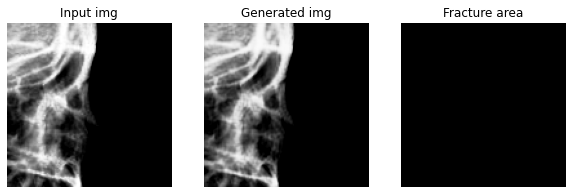


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


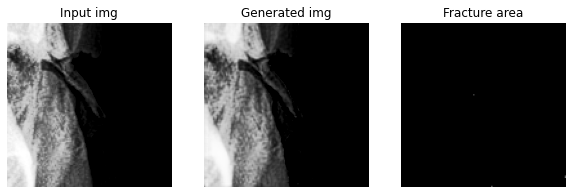


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.996 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 0.995 (0 : Normal, 1 : Fracture)


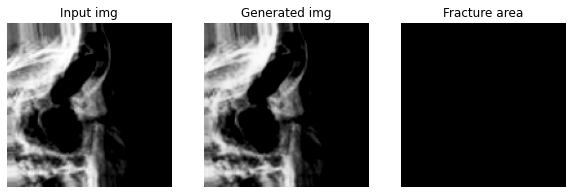


Input is classified as Normal image 0.0 (0 : Normal, 1 : Fracture)
Classified as Normal Image 0.001 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.002 (0 : Normal, 1 : Fracture)


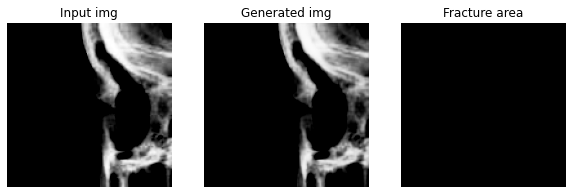


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 0.979 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Normal Image 0.151 (0 : Normal, 1 : Fracture)


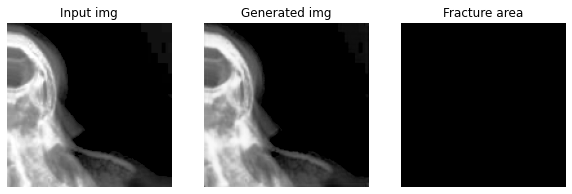


Input is classified as Fracture image 1.0 (0 : Normal, 1 : Fracture)
Classified as fractrue Image 1.000 (0 : Normal, 1 : Fracture)
Generated is Discriminated as Real image 0.000 (0 : Real, 1 : Fake)
Generated is classified as Fracture Image 1.000 (0 : Normal, 1 : Fracture)


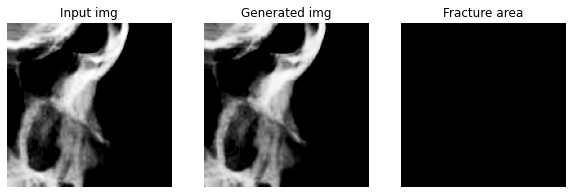

In [0]:
# 0.0006 0.9988 0.0006
show_result(X_test,threshold = 0.3)

In [0]:
# 모델 저장
whole_model.save('./model/eq_whole_0006_epoch10.h5')
print('==model saved==')

==model saved==
